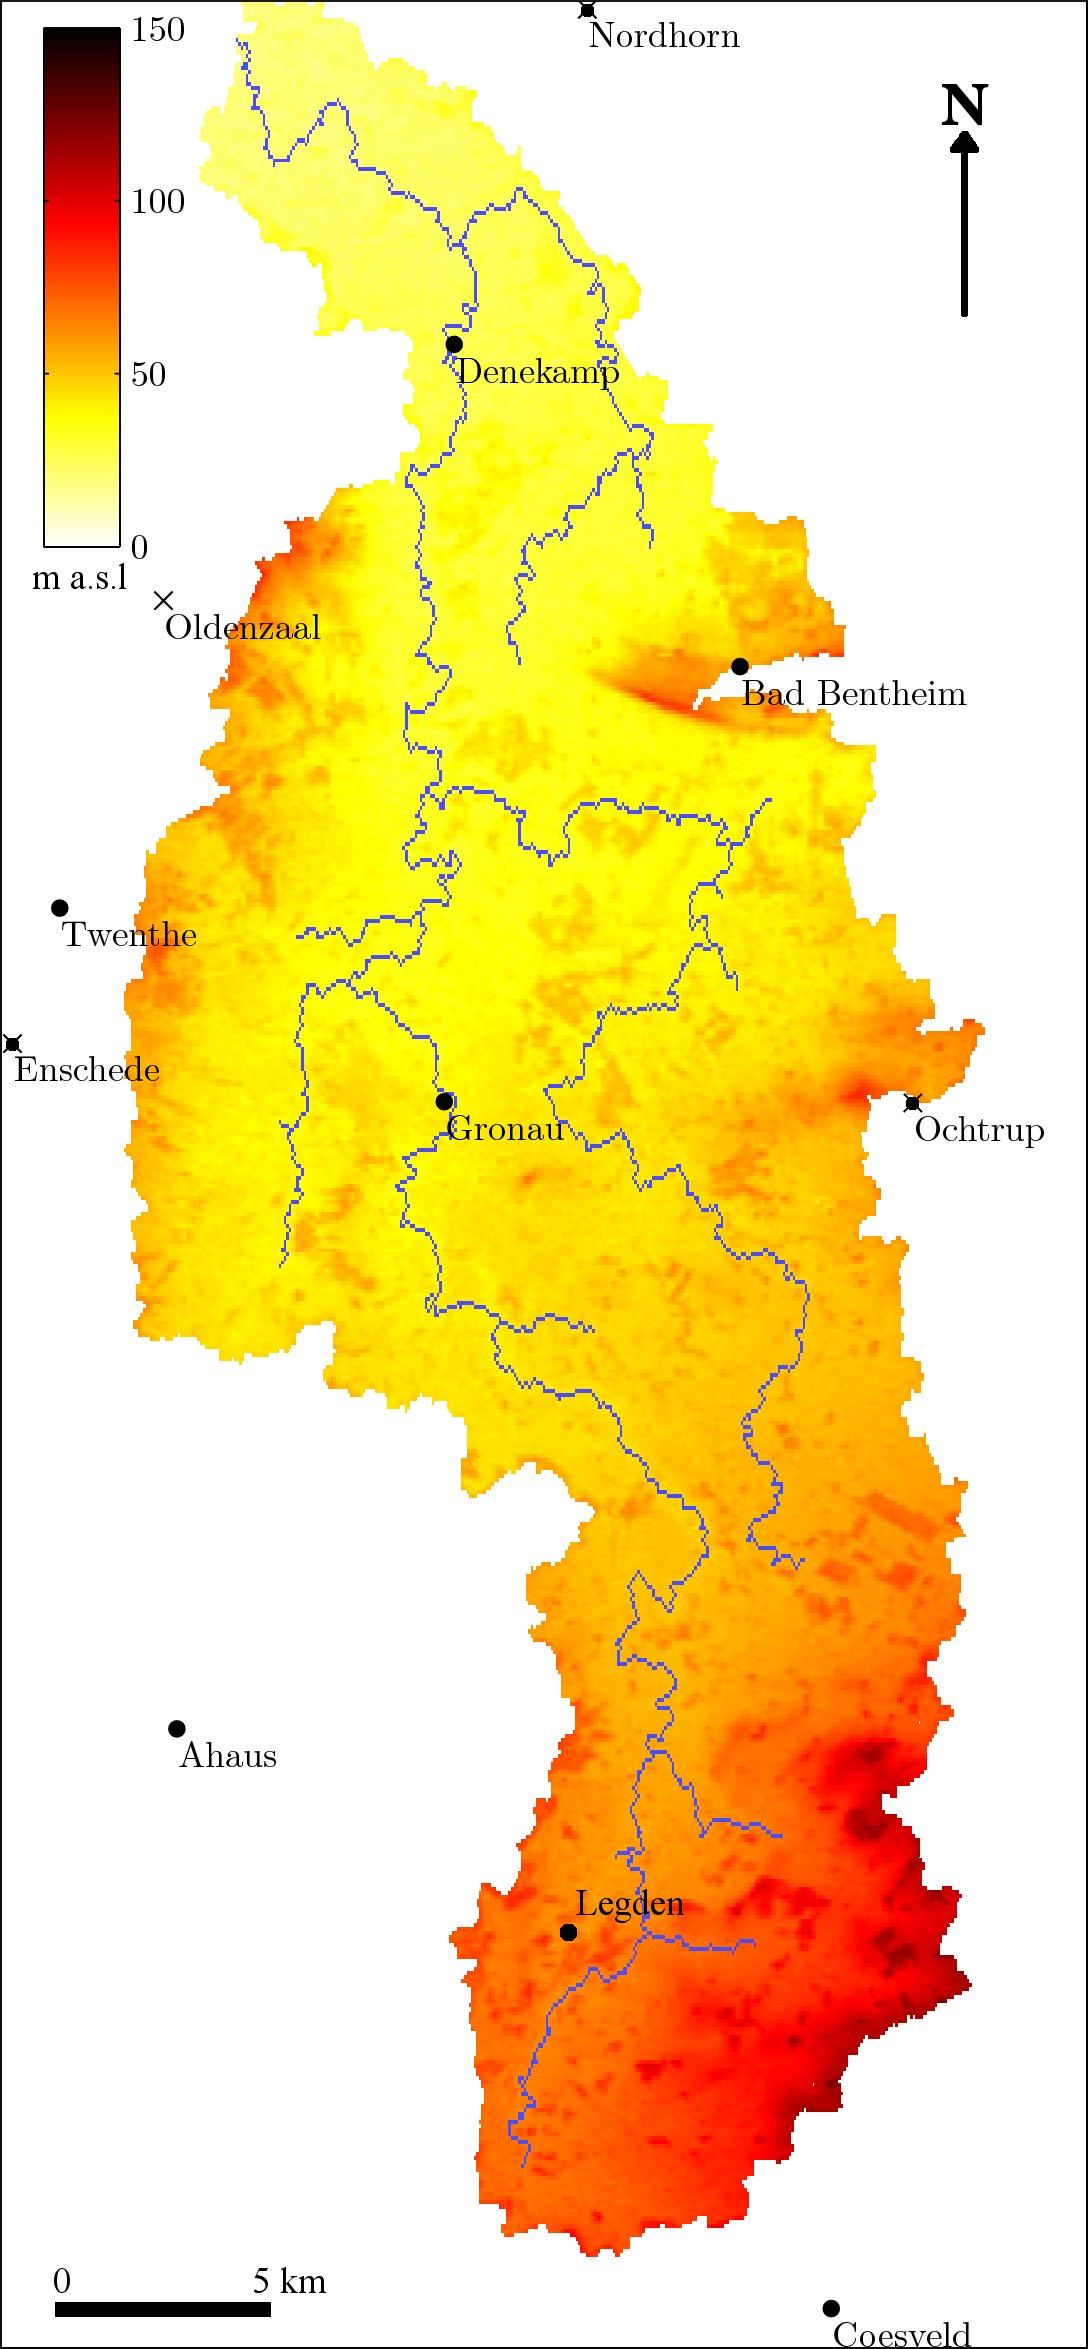

In [16]:
# Load packages

import geopandas as gpd
from longsgis import voronoiDiagram4plg
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import shape
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [17]:
# This function calculates Thiessen polygons for you

def run_thiessen(select_time):
    
    # Select relevant stations and Convert shapefiles to GeoJSON
    shp_file = gpd.read_file(select_time + 'catchment.shp')
    shp_file.to_file('boundary.geojson', driver='GeoJSON')
    shp_file = gpd.read_file(select_time + 'Stations.shp')
    shp_file.to_file('input.geojson', driver='GeoJSON')
    
    # Analyze to Voronoi (I.e. thiessen polygons)
    builtup = gpd.read_file('input.geojson'); builtup.crs = 32650
    boundary = gpd.read_file('boundary.geojson'); boundary.crs = 32650
    vd = voronoiDiagram4plg(builtup, boundary)
    vd.to_file('output.geojson', driver='GeoJSON')

    # Read location of stations for which we have precipitation data
    gdf = gpd.read_file(select_time + "Stations.shp")
    gdf.head()

    # Show the catchment shapefile (including the stations)
    #boundary = gpd.read_file(select_time + 'Catchment.shp')
    fig, ax = plt.subplots(figsize=(12, 10))
    vd.plot(ax=ax, color='grey')
    gdf.plot(ax=ax, markersize=100, color='red')
    ax.axis('on')
    plt.axis('equal')
    plt.show()
    
    # Calculate relative area of each polygon
    relative_size_areas = vd.area/sum(vd.area)
    stations_list = builtup.Name
    print('The weight of stations (from outh to North)')
    return stations_list, relative_size_areas

In [18]:
# Run this function for the different time periods
widgets.interact(run_thiessen, select_time = ['1950-1964/', '1964-1980/', '1980-1993/', '1993-2006/', '2006-2010/'])

interactive(children=(Dropdown(description='select_time', options=('1950-1964/', '1964-1980/', '1980-1993/', '…

<function __main__.run_thiessen(select_time)>

In [4]:
#print('the stations that have measurements are...')
#print(stations_list)
#relative_size_areas = vd.area/sum(vd.area)
#print('these stations have the following weight.')

In [9]:
#print(relative_size_areas)

In [9]:
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
Y = [ 0,   1,   1,   0,   1,   2,   2,   0,   1 ]
Stationlist2 = [station_list for _,station_list in sorted(zip(,station_list))]
print(Stationlist2)  # ["a", "d", "h", "b", "c", "e", "i", "f", "g"]

['a', 'd', 'h', 'b', 'c', 'e', 'i', 'f', 'g']


In [13]:
print(builtup)

NameError: name 'builtup' is not defined